<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_2_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.539568,30.111503,89.153273,-0.026857,188.777486,188.802523,-0.025037
1,0.0,1.0,98.393300,83.703019,94.094436,0.008500,286.199255,286.191843,0.007412
2,0.0,2.0,61.635434,48.366375,52.105886,-0.002150,172.105545,172.106745,-0.001199
3,0.0,3.0,24.133448,44.016335,94.745133,-0.001651,172.893266,172.893964,-0.000698
4,0.0,4.0,23.611482,50.060840,49.607761,0.001835,133.281917,133.279297,0.002619
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,80.196113,75.507688,22.066087,0.006503,187.776391,187.771416,0.004974
119996,999.0,116.0,87.010918,45.730349,76.407961,-0.004630,219.144599,219.148983,-0.004384
119997,999.0,117.0,56.141006,78.228085,22.995091,0.006405,167.370587,167.365177,0.005410
119998,999.0,118.0,94.477361,54.364680,91.287206,-0.008398,250.120850,250.129414,-0.008565


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.539568,30.111503,89.153273,-0.026857,188.777486,188.802523,-0.025037
1,0.0,1.0,98.393300,83.703019,94.094436,0.008500,286.199255,286.191843,0.007412
2,0.0,2.0,61.635434,48.366375,52.105886,-0.002150,172.105545,172.106745,-0.001199
3,0.0,3.0,24.133448,44.016335,94.745133,-0.001651,172.893266,172.893964,-0.000698
4,0.0,4.0,23.611482,50.060840,49.607761,0.001835,133.281917,133.279297,0.002619
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,80.196113,75.507688,22.066087,0.006503,187.776391,187.771416,0.004974
119996,999.0,116.0,87.010918,45.730349,76.407961,-0.004630,219.144599,219.148983,-0.004384
119997,999.0,117.0,56.141006,78.228085,22.995091,0.006405,167.370587,167.365177,0.005410
119998,999.0,118.0,94.477361,54.364680,91.287206,-0.008398,250.120850,250.129414,-0.008565


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    59.539568  30.111503  89.153273 -0.026857  188.777486   
      1.0    98.393300  83.703019  94.094436  0.008500  286.199255   
      2.0    61.635434  48.366375  52.105886 -0.002150  172.105545   
      3.0    24.133448  44.016335  94.745133 -0.001651  172.893266   
      4.0    23.611482  50.060840  49.607761  0.001835  133.281917   
...                ...        ...        ...       ...         ...   
999.0 115.0  80.196113  75.507688  22.066087  0.006503  187.776391   
      116.0  87.010918  45.730349  76.407961 -0.004630  219.144599   
      117.0  56.141006  78.228085  22.995091  0.006405  167.370587   
      118.0  94.477361  54.364680  91.287206 -0.008398  250.120850   
      119.0  60.363235  39.817362  97.021617  0.001108  207.203322   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    188.802523 -0.025037  
      1.0    286.191843  0.007412  
      2.0    172.106745 -0.001199  
      3.0    172.893964 -0.000698  
      4.0    133.279297  0.002619  
...                 ...       ...  
999.0 115.0  187.771416  0.004974  
      116.0  219.148983 -0.004384  
      117.0  167.365177  0.005410  
      118.0  250.129414 -0.008565  
      119.0  207.200753  0.002569  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    59.539568  30.111503  89.153273 -0.026857  188.777486   
      1.0    98.393300  83.703019  94.094436  0.008500  286.199255   
      2.0    61.635434  48.366375  52.105886 -0.002150  172.105545   
      3.0    24.133448  44.016335  94.745133 -0.001651  172.893266   
      4.0    23.611482  50.060840  49.607761  0.001835  133.281917   
...                ...        ...        ...       ...         ...   
999.0 115.0  80.196113  75.507688  22.066087  0.006503  187.776391   
      116.0  87.010918  45.730349  76.407961 -0.004630  219.144599   
      117.0  56.141006  78.228085  22.995091  0.006405  167.370587   
      118.0  94.477361  54.364680  91.287206 -0.008398  250.120850   
      119.0  60.363235  39.817362  97.021617  0.001108  207.203322   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    188.802523 -0.025037  
      1.0    286.191843  0.007412  
      2.0    172.106745 -0.001199  
      3.0    172.893964 -0.000698  
      4.0    133.279297  0.002619  
...                 ...       ...  
999.0 115.0  187.771416  0.004974  
      116.0  219.148983 -0.004384  
      117.0  167.365177  0.005410  
      118.0  250.129414 -0.008565  
      119.0  207.200753  0.002569  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.539568,30.111503,89.153273,-0.026857,188.777486,188.802523,-0.025037
1,0.0,1.0,98.393300,83.703019,94.094436,0.008500,286.199255,286.191843,0.007412
2,0.0,2.0,61.635434,48.366375,52.105886,-0.002150,172.105545,172.106745,-0.001199
3,0.0,3.0,24.133448,44.016335,94.745133,-0.001651,172.893266,172.893964,-0.000698
4,0.0,4.0,23.611482,50.060840,49.607761,0.001835,133.281917,133.279297,0.002619
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,80.196113,75.507688,22.066087,0.006503,187.776391,187.771416,0.004974
119996,999.0,116.0,87.010918,45.730349,76.407961,-0.004630,219.144599,219.148983,-0.004384
119997,999.0,117.0,56.141006,78.228085,22.995091,0.006405,167.370587,167.365177,0.005410
119998,999.0,118.0,94.477361,54.364680,91.287206,-0.008398,250.120850,250.129414,-0.008565


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    59.539568  30.111503  89.153273 -0.026857  188.777486   
      1.0    98.393300  83.703019  94.094436  0.008500  286.199255   
      2.0    61.635434  48.366375  52.105886 -0.002150  172.105545   
      3.0    24.133448  44.016335  94.745133 -0.001651  172.893266   
      4.0    23.611482  50.060840  49.607761  0.001835  133.281917   
...                ...        ...        ...       ...         ...   
999.0 115.0  80.196113  75.507688  22.066087  0.006503  187.776391   
      116.0  87.010918  45.730349  76.407961 -0.004630  219.144599   
      117.0  56.141006  78.228085  22.995091  0.006405  167.370587   
      118.0  94.477361  54.364680  91.287206 -0.008398  250.120850   
      119.0  60.363235  39.817362  97.021617  0.001108  207.203322   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    188.802523 -0.025037  
      1.0    286.191843  0.007412  
      2.0    172.106745 -0.001199  
      3.0    172.893964 -0.000698  
      4.0    133.279297  0.002619  
...                 ...       ...  
999.0 115.0  187.771416  0.004974  
      116.0  219.148983 -0.004384  
      117.0  167.365177  0.005410  
      118.0  250.129414 -0.008565  
      119.0  207.200753  0.002569  

[120000 rows x 7 columns]

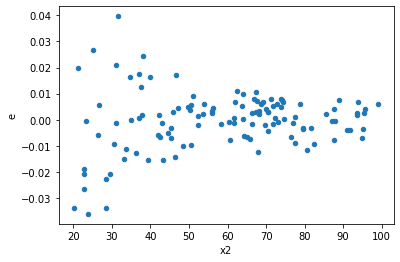

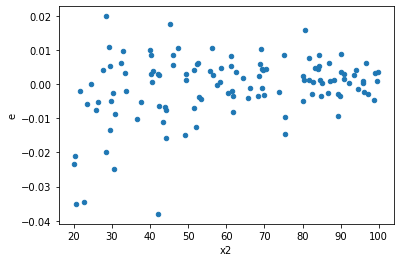

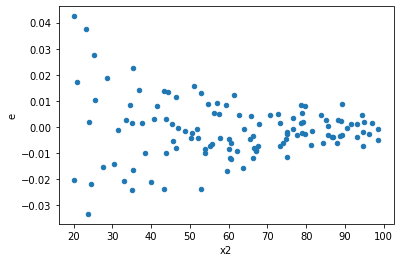

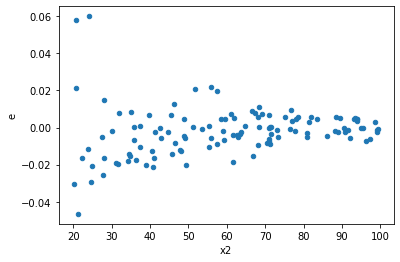

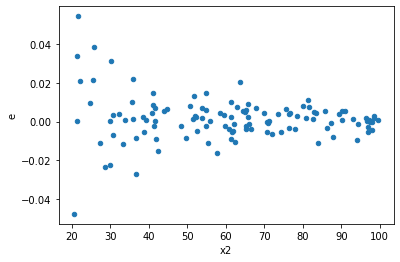

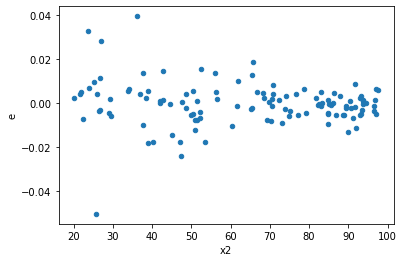

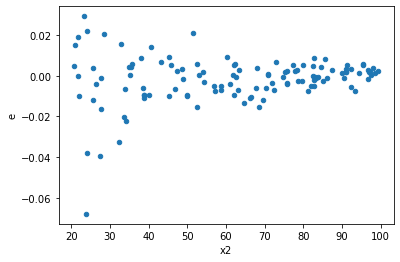

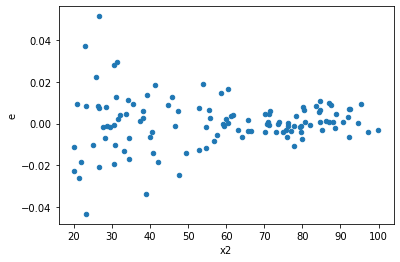

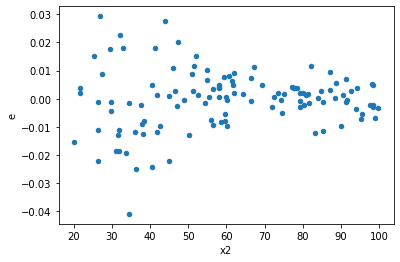

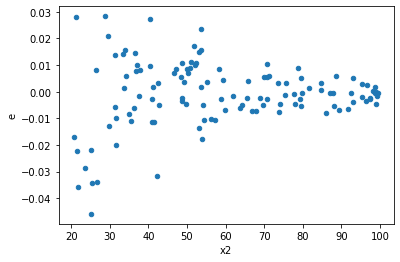

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
423.0,45.0,45.0,0.003975627757132896,0.004314798937099032,8.834728349184213e-05,9.588442082442294e-05,1.0853126099035832,0.7848264878749822,0.6075867560625089,0.3924132439374911,Reject005=1 : Homoscedasticity
642.0,45.0,45.0,0.005614397559297755,0.008391834311864634,0.00012476439020661677,0.00018648520693032518,1.4946989811876235,0.18148959946292376,0.9092552002685381,0.09074479973146188,Reject005=1 : Homoscedasticity
644.0,45.0,45.0,0.005511349109433947,0.005787595133093678,0.0001224744246540877,0.0001286132251798595,1.050123121975139,0.8704210837033135,0.5647894581483432,0.43521054185165675,Reject005=1 : Homoscedasticity
685.0,45.0,45.0,0.005437799551580324,0.0070875613268259596,0.00012083999003511831,0.00015750136281835465,1.3033877507982405,0.3774945190141157,0.8112527404929422,0.18874725950705784,Reject005=1 : Homoscedasticity
687.0,45.0,45.0,0.007207101940428332,0.007970583776007473,0.00016015782089840737,0.0001771240839112772,1.105934651943298,0.7370323564068331,0.6314838217965835,0.36851617820341653,Reject005=1 : Homoscedasticity
773.0,45.0,45.0,0.003983904048544698,0.004305748084897433,8.853120107877106e-05,9.56832907754985e-05,1.0807860913392988,0.7955583035391123,0.6022208482304439,0.39777915176955614,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.009985084912436479,0.002133167235612928,0.00022189077583192174,4.740371634695396e-05,0.21363536257524024,8.50029221196264e-07,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.014233237928325166,0.005190836703201368,0.0003162941761850037,0.00011535192673780817,0.36469823165614546,0.0009759635286338274,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,0.008644940500872495,0.0020055908238144635,0.00019210978890827767,4.4568684973654746e-05,0.23199590831331324,2.863394463337855e-06,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,0.00663449118445022,0.0027120314270576264,0.00014743313743222712,6.026736504572503e-05,0.40877760655014933,0.003318921149776819,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.007993498988212819,0.0022511855265239192,0.00017763331084917375,5.0026345033864874e-05,0.2816270484106533,4.1761169165537585e-05,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,0.008207085789004722,0.0035907989513726374,0.00018237968420010492,7.979553225272528e-05,0.4375242374319199,0.006535678498482575,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,0.008282683010214389,0.001503313849060122,0.00018405962244920864,3.3406974423558266e-05,0.18150083097544623,6.829827167386859e-08,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.007516239191268196,0.002313338656980861,0.00016702753758373768,5.1407525710685803e-05,0.30777874387876386,0.00013051417731184989,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.006700882299402238,0.005489112383861277,0.00014890849554227196,0.00012198027519691726,0.8191626324119946,0.5061796899417936,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    905
Reject005=1 : Homoscedasticity       95
Name: Result_test, dtype: int64